# Module 23 - Simpson's Rule and Monte Carlo Integration

<img src="https://upload.wikimedia.org/wikipedia/commons/6/67/Simpsonsrule2.gif" width=450px align='left'>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" width=300px align='left'>

## Goals

- Trapezoid and Simpson's rule for numerical integration
- Monte Carlo integration

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Better Quadrature

We want to come up with a better scaling approximation to the definite integral:

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

where we break up the region of integration into $N$ equally sized regions of size:

\begin{equation}
\Delta x = \frac{b-a}{N}.
\end{equation}

Our previous methods approximated the integral of a single panel $I_i = \int_{x_i}^{x_{i+1}} f(x) dx$ using a $0^{th}$ or $1^{st}$ order polynomial.  Now, let's use a $2^{nd}$ order polynomial:

\begin{equation}
P(x) = \alpha + \beta x + \gamma x^2
\end{equation}

where we need to fix the coefficients $\alpha,\beta,\gamma$ by matching:

\begin{equation}
\int_{x_i}^{x+2} P(x) dx \approx \int_{x_i}^{x_{i+2}} f(x) dx .
\end{equation}

The final answer is: 

\begin{equation}
I_i + I_{i+1} \approx \frac{\Delta x}{3} \left[f(x_i) + 4 f(x_{i+1}) + f(x_{i+2}) \right]
\end{equation}

which needs to be summed over all panels:

\begin{equation}
I_{\rm simps} \approx \frac{\Delta x}{3} \left[f(a) + f(b) + 4\sum_{i=1}^{N/2} f(x_{2i-1}) + 2\sum_{i=1}^{N/2-1} f(x_{2i}) \right]
\end{equation}

<div class="span alert alert-danger">
Note: we need an even number of panels for this to work.
</div>

Let's code it up!

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Create a function `mysimpson(y,x)` that calculates the integral of a function on regularly sampled intervals using Simpson's rule. Use this function to calculate the integral of $e^{-x}$ in the interval $x=1\ldots2$. Compare your result with trapezoidal rule.
</div>

In [9]:
from scipy.integrate import trapz,simps

def mytrapz(y, x):
    dx = x[1] - x[0]
    return (y[0] + y[-1])*dx/2.0 + y[1:-1].sum()*dx

def mysimpson(y,x):
    dx = x[1] - x[0]
    return (y[0] + y[-1])*dx/3.0 + 4*y[1:-1:2].sum()*dx/3.0 + 2*y[2:-1:2].sum()*dx/3.0

def f(x):
    return np.exp(-x)

x = np.linspace(1,2,51)

print('mytrapz = {0}'.format(mytrapz(f(x),x)))
print('scipy trapz = {0}'.format(trapz(f(x),x)))
print('mysimpson = {0}'.format(mysimpson(f(x),x)))
print('scipy simpson = {0}'.format(simps(f(x),x)))
print('Exact = {0}'.format(-np.exp(-2)+np.exp(-1)))

mytrapz = 0.232551909355085
scipy trapz = 0.23255190935508482
mysimpson = 0.2325441581415259
scipy simpson = 0.2325441581415257
Exact = 0.23254415793482963


## Beyond One-Dimension

Until now we have performed numerical integrals by approximating them as a disccrete sum over equally sized panels with width:

\begin{equation}
\Delta x = \frac{b-a}{N}.
\end{equation}

### Rectangular

\begin{equation}
\int_a^b f(x) dx = \frac{b-a}{N} \sum_{j=0}^{N-1} f\left(a + \frac{j(b-a)}{N}\right) + \mathrm{O}\left(\frac{1}{N}\right). 
\end{equation}

### Trapezoidal

\begin{equation}
\int_a^b f(x) dx = \frac{b-a}{N}\left [\frac{1}{2}f(a) +  \sum_{j=1}^{N-1} f\left(a + \frac{j(b-a)}{N}\right) +\frac{1}{2}f(b)\right] + \mathrm{O}\left(\frac{1}{N^2}\right). 
\end{equation}

### Simpson

\begin{equation}
\int_a^b f(x) dx = \frac{b-a}{3N}\left \{ f(a) +  \sum_{j=1}^{N-1}\left[3-(-1)^j\right] f\left(a + \frac{j(b-a)}{N}\right) +f(b)\right\} + \mathrm{O}\left(\frac{1}{N^4}\right). 
\end{equation}

We now ask how these methods scale in higher dimensions, i.e.:

\begin{equation}
I = \int dx_1 \int dx_2 \cdots \int dx_d\, f(\vec{x}).
\end{equation}

We will need to break up $d$-dimensional space into a grid with $N$ panels in each dimension which will form $M = N^d$ total points at which we must evaulate our function.  If we say a quadrature method is $k^{th}$ order of the error scales as $N^{-k}$ then using this method in $d$ dimensions will lead to an error:

\begin{equation}
\mathrm{Error} \sim \frac{1}{N^k} = \frac{1}{M^{k/d}}.
\end{equation}

<br />
<div class="span alert alert-danger">
This is bad!  An order $k$-scheme in 1-dimension is an order $k/d$ scheme in $d$-dimensions.
</div>

## Integrals as Averages - Monte Carlo Integration

Consider a $d$-dimensional region of space $\Omega$ and a function $f: \mathbb{R}^d \to \mathbb{R}$.  We are interested in the integral:

\begin{equation}
\int_{\Omega} d\vec{x}\, f(\vec{x})
\end{equation}

We can re-write the integral as an average of the function over the region $\Omega$ with the uniform probability:

\begin{equation}
P(\vec{x}) = \frac{1}{\int_\Omega d\vec{x}}
\end{equation}

which gives: 

\begin{equation}
\langle f \rangle_\Omega =  \int_{\Omega} d\vec{x}\, P(\vec{x}) f(\vec{x}).
\end{equation}

We can use this property to find the integral of the function over the domain by computing its mean value:

\begin{equation}
\int_{\Omega} d\vec{x}\, f(\vec{x}) = \langle f \rangle_\Omega \int_\Omega d\vec{x} .
\end{equation}

In one dimension this becomes

\begin{equation}
\int_{a}^{b} dx\, f(x) = (b-a) \langle f \rangle_\Omega.
\end{equation}

Similarly in two dimensions

\begin{equation}
\int_{c}^{d} dy \int_{a}^{b} dx\, f(x,y) = (b-a)(d-c) \langle f \rangle_\Omega.
\end{equation}

If we select $M$ points at random from the uniform distribution $\vec{x}_i \in \mathcal{U}_\Omega$, then we can approximate the average as:

\begin{equation}
\langle f \rangle_\Omega \approx \frac{1}{M} \sum_{i=0}^{M-1} f(\vec{x}_i).
\end{equation}

Computing the average by sampling from a random distribution of points provides an accurate estimate in the limit of large numbers, and is much more effective in higher dimensions as we will see in the following section.


### What is the Error Associated with MC Integration?

The error in computing the integral is now stochastic (as opposed to systematic).  How can we estimate it?

Suppose we repeat the process of performing the integral many times, i.e. we generate many sets of $M$ points.  The error will be related to the variance of the resulting values for the average.

\begin{align*}
\sigma_I^2 &= \langle I^2\rangle - \langle I\rangle^2 \newline
&= \left\langle \left(\frac{1}{M} \sum_{i=0}^{M-1} f_i\right)^2\right\rangle - \left( \left\langle \frac{1}{M} \sum_{i=0}^{M-1} f_i\right\rangle\right)^2 \newline
&= \frac{1}{M^2}\left[\sum_{i=0}^{M-1} \sum_{j=0}^{M-1}\langle f_i f_j \rangle - \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \langle f_i \rangle\langle f_j \rangle\right] \newline
&= \frac{1}{M^2}\left[\sum_{i=0}^{M-1} \langle f_i^2 \rangle + \sum_{i\ne j}\langle f_i f_j \rangle - \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \langle f_i \rangle\langle f_j \rangle\right] \newline
\end{align*}

Now, for completely uncorrelated measurements:

\begin{equation}
\langle f_i f_j \rangle = \langle f_i \rangle \langle f_j \rangle
\end{equation}

and we are left with:

\begin{equation}
\sigma_I^2 = \frac{1}{M^2} \sum_{i=0}^{M-1} \left( \langle f_i^2 \rangle - \langle f_i \rangle^2\right).
\end{equation}

However, $\langle \cdots \rangle$ means that we are sampling the function of a large number of *sets* of numbers $\left\{\vec{x}_i\right\}$ so:

\begin{equation}
\langle f_i \rangle = \langle f \rangle
\end{equation}

and we are left with:

\begin{equation}
\sigma_I^2 =  \frac{1}{M} \left(\langle f_i^2 \rangle - \langle f_i \rangle^2 \right) = \frac{\sigma_f^2}{M}.
\end{equation}

This is just a result of the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and shows that the error in our Monte Carlo integration technicle is:

\begin{equation}
\mathrm{O}\left(\frac{1}{M^{1/2}}\right).
\end{equation}

Recall that we found for $d$-dimensions, the trapezoidal method had an $\mathrm{O}(M^{-2/d})$ error, thus Monte Carlo beats trapezoidal for $d>4$.

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Create a function `mc(f,a,b,M)` that calculates the integral of a function `f(x)` in the interval $a\ldots b$ using $M$ points. Use this function to calculate the integral of $e^{-x}$ in the interval $x=1\ldots2$. Compare the relative error of the trapezoidal and Simpson's rule with the Monte Carlo method for increasing number intervals/points.
</div>

In [10]:
def mc(f,a,b,M):
    x = (b-a)*np.random.random(M) + a # generate M random numbers between a and b
    return f(x).mean()*(b-a)

<IPython.core.display.Javascript object>


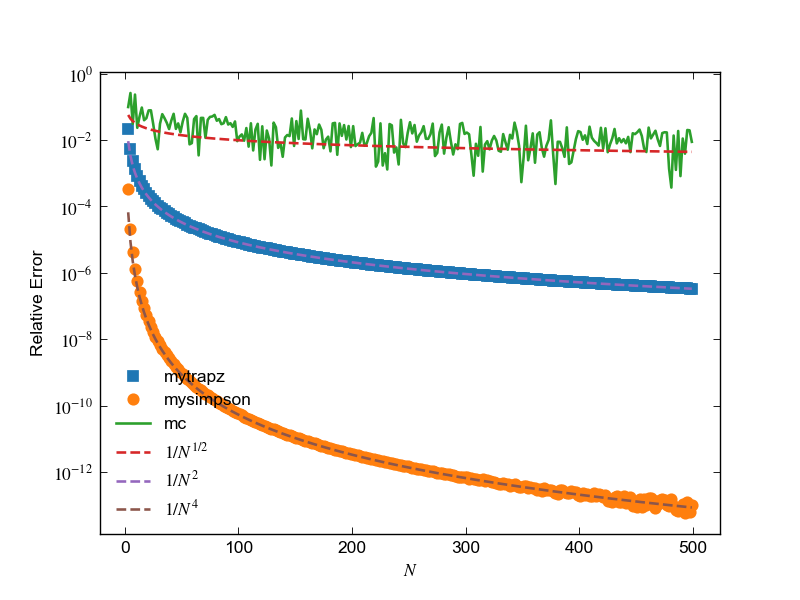

In [11]:
Itrapz = []
Isimps = []
Imc = []
N = np.arange(3,500,2)
for n in N:
    x = np.linspace(1,2,n)
    Itrapz.append(mytrapz(f(x),x))
    Isimps.append(mysimpson(f(x),x))
    Imc.append(mc(f,1,2,n))

Itrapz = np.array(Itrapz)
Isimps = np.array(Isimps)
Imc = np.array(Imc)
exact = -np.exp(-2)+np.exp(-1)
Itrapz_err = np.abs(Itrapz-exact)/exact
Isimps_err = np.abs(Isimps-exact)/exact
Imc_err = np.abs(Imc-exact)/exact
plt.figure()
plt.semilogy(N, Itrapz_err, 's', label='mytrapz')
plt.semilogy(N, Isimps_err, 'o', label='mysimpson')
plt.semilogy(N, Imc_err, label='mc')
plt.semilogy(N, Imc_err[0]/np.sqrt(N), ls='--', label=r'$1/N^{1/2}$')
plt.semilogy(N, 4*Itrapz_err[0]/(N)**2, ls='--', label=r'$1/N^{2}$')
plt.semilogy(N, 16*Isimps_err[0]/(N)**4, ls='--', label=r'$1/N^{4}$')
plt.ylabel('Relative Error')
plt.xlabel(r'$N$')
plt.legend()

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Use Monte Carlo integration to aproximate the integral of the $2$-dimensional function $f(\vec{x})$ on the unit square.
</div>

\begin{equation}
I = \int_{-1/2}^{1/2} dy \int_{-1/2}^{1/2} dx \, \mathrm{e}^{-x^2 -y^2 -x^2 y^2}
\end{equation}

<IPython.core.display.Javascript object>


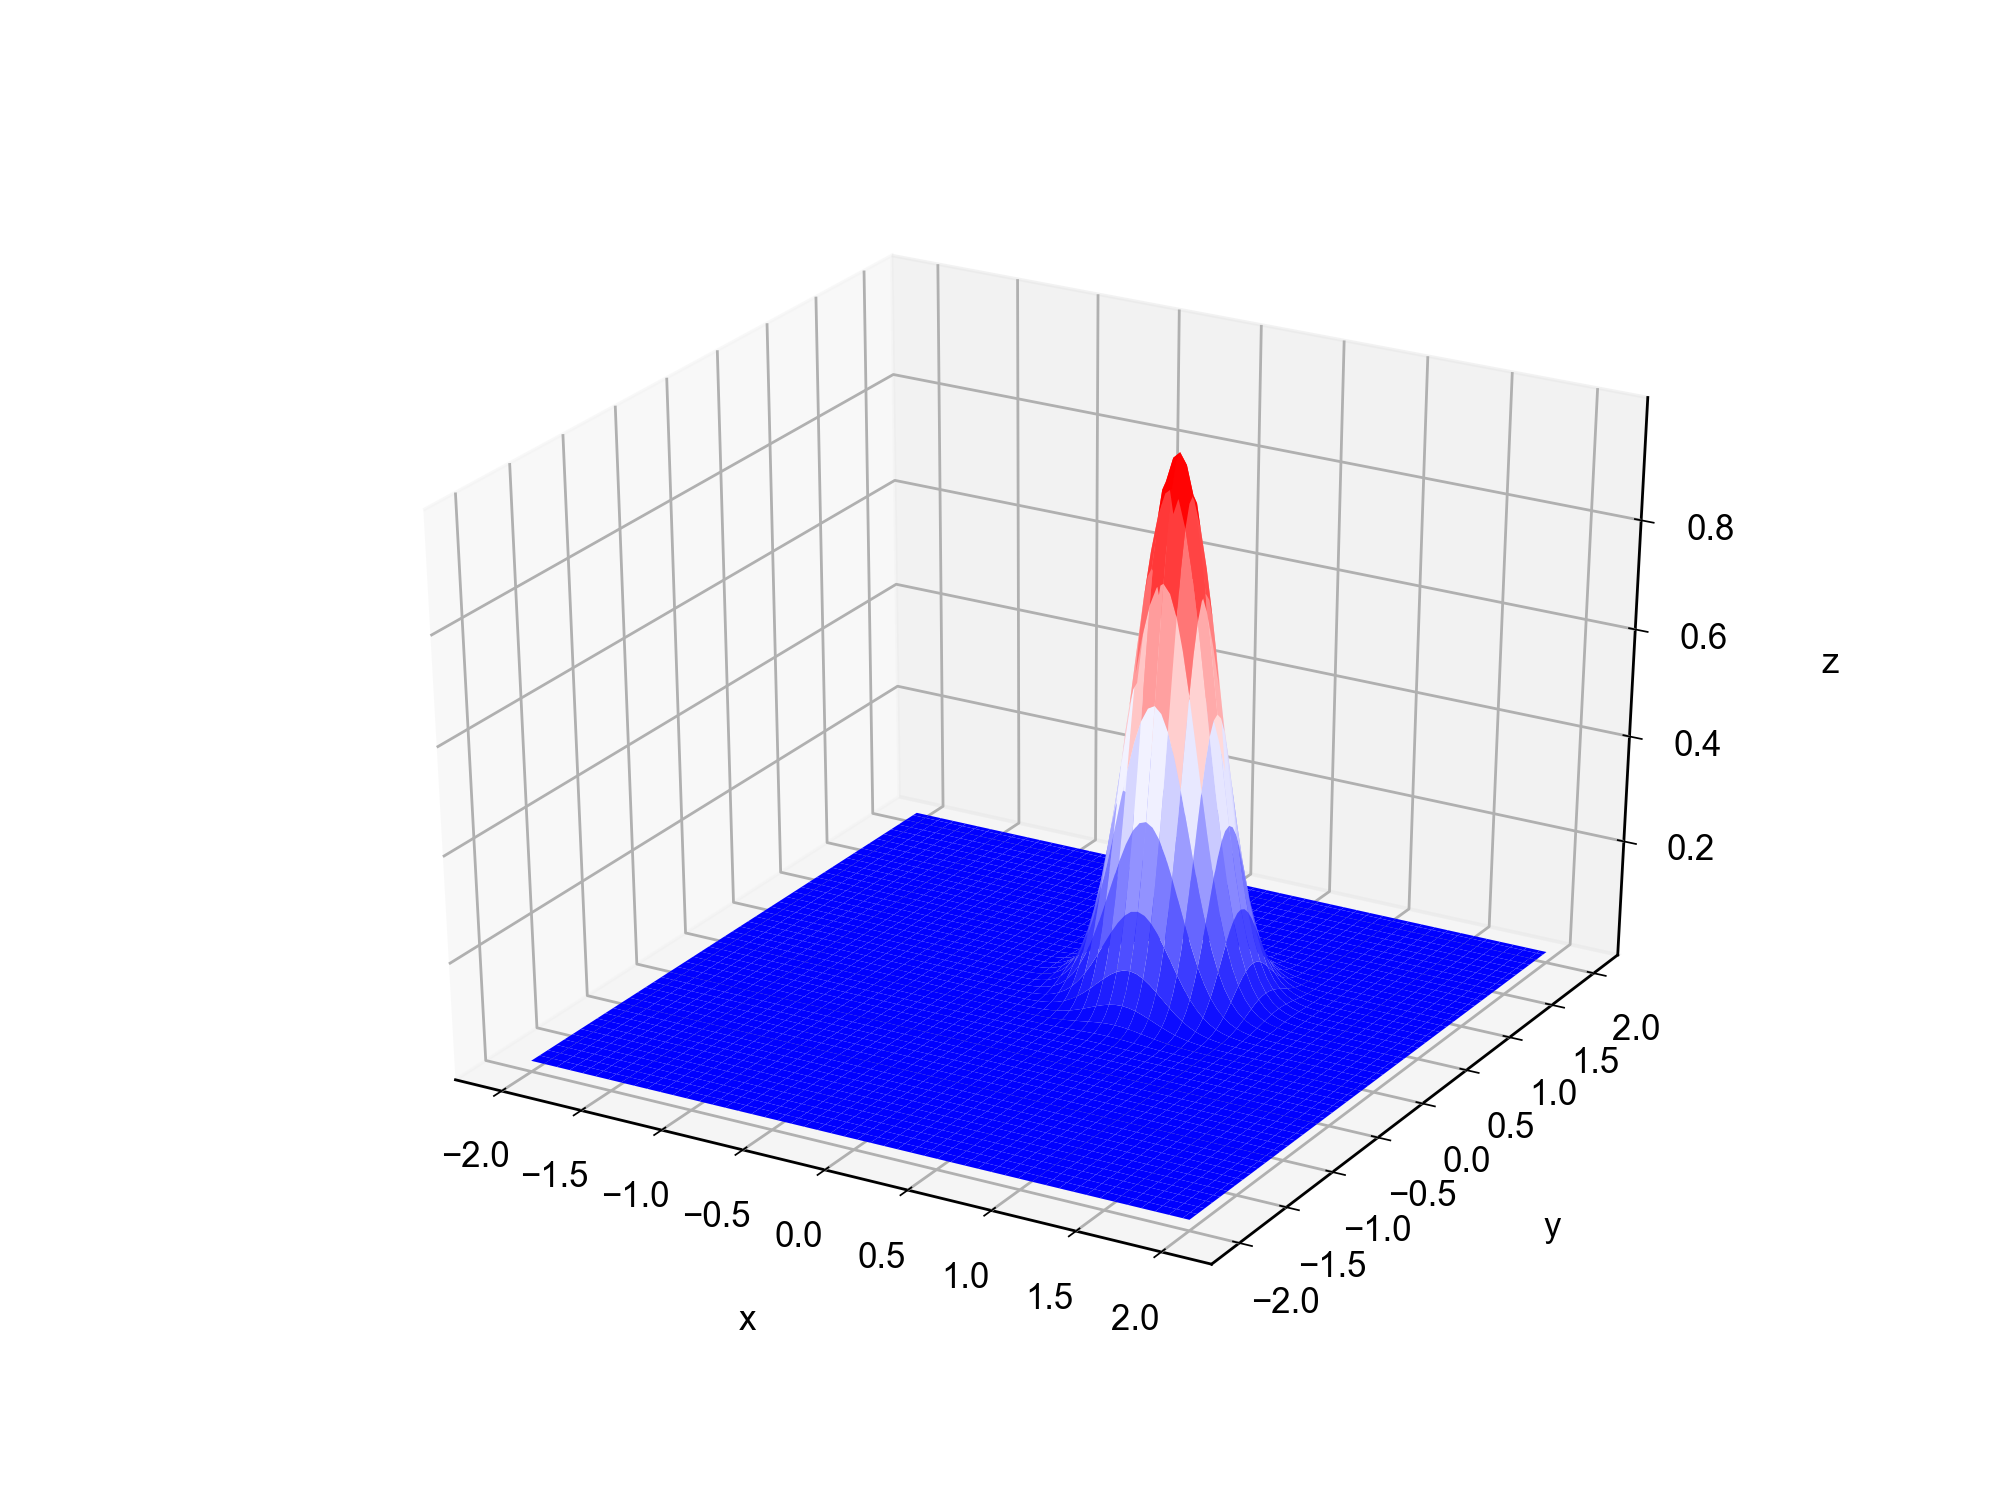

Text(0.5, 0, 'z')

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return np.exp((-(x-0.5)**2 - (y-0.5)**2 - (x-0.5)**2*(y-0.5)**2)/0.1)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
surf = ax.plot_surface(X, Y, f(X,Y), rstride=2, cstride=2, cmap='bwr', linewidth=0, antialiased=True)

ax.set_xlabel('x',labelpad=14)
ax.set_ylabel('y',labelpad=14)
ax.set_zlabel('z',labelpad=14)

In [13]:
def mc2D(f,lx,ly,M):
    x = (lx[1]-lx[0])*np.random.random(M) + lx[0] # generate M random numbers between lx[0] and lx[1]
    y = (ly[1]-ly[0])*np.random.random(M) + ly[0] # generate M random numbers between ly[0] and ly[1]
    return f(x,y).mean()*(lx[1]-lx[0])*(ly[1]-ly[0])

lx = (-1/2,1/2)
ly = (-1/2,1/2)

print('mc2D result = {0}'.format(mc2D(f, lx, ly, 100000)))

mc2D result = 0.846108094652203


<IPython.core.display.Javascript object>


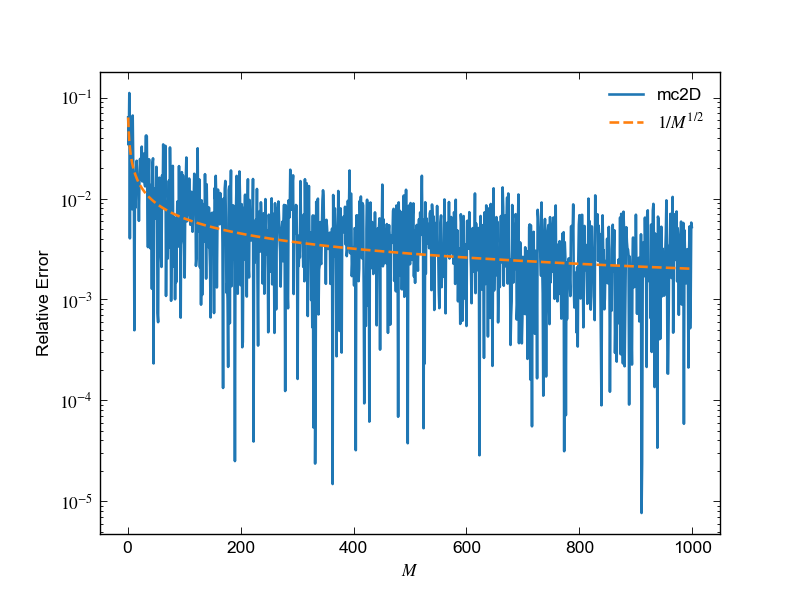

In [14]:
exact = 0.846008

Imc = []
M = np.arange(1,1000)
for m in M:
    Imc.append(mc2D(f, lx, ly, m))

Imc = np.array(Imc)
Imc_err = np.abs(Imc-exact)/exact

plt.figure()
plt.semilogy(M, Imc_err, label='mc2D')
plt.semilogy(M, Imc_err[0]/np.sqrt(M), ls='--', label=r'$1/M^{1/2}$')
plt.ylabel('Relative Error')
plt.xlabel(r'$M$')
plt.legend()